# Transient Rates Using BPASS Data

This code is based on the 'Transiet rates' example Jupyter notebook found when looking into HOKI 

It uses BPASS v2.2.1 (specifically bpass_v2.2.1_imf135_300)

The transient rates plotted correspond to the stellar populations that include binary systems for a standard (Salpeter) IMF with slope -1.35 from 0.1 to 0.5 M$_{\odot}$ and a maximum mass of 300 solar masses 


Two different metalicities were used (Z = 0.02 and Z = 0.001) corresponding to the files:  

 `supernova-bin-imf135_300.z020.dat`

 `supernova-bin-imf135_300.z001.dat`


Note that Z = 0.02 is referred to as z_1 and Z = 0.001 as z_2 throughout this code 


#### Imports

In [1]:
from hoki import load
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import h5py

#### Loading in data and initial set up 

In [2]:
#Loading the binary and single star population transit rates
bin_rates_z_1 = load.model_output('/Users/dillon/Desktop/bpass_v2.2.1_imf135_300/supernova-bin-imf135_300.z020.dat')
bin_rates_z_2 = load.model_output('/Users/dillon/Desktop/bpass_v2.2.1_imf135_300/supernova-bin-imf135_300.z001.dat')


bin_rates_z_1 = bin_rates_z_1[:-1]
bin_rates_z_2 = bin_rates_z_2[:-1]
#Ignoring the last time bin in BPASS

In [3]:
age_z_1 = bin_rates_z_1.log_age.values
bin_size_z_1 = bin_rates_z_1.age_yrs.values

age_z_2 = bin_rates_z_2.log_age.values
bin_size_z_2 = bin_rates_z_2.age_yrs.values

#### CCSNe

Core collapse supernovae comprise the type IIP, II, Ibm and Ic. The total rate is obtained by summing these columns as well as putting the single star and binary populations together  

In [4]:
ccsne_z_1 = ( bin_rates_z_1[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))

ccsne_z_2 = ( bin_rates_z_1[['IIP', 'II', 'Ib', 'Ic']].sum(axis=1))

#### Units

Want the rates to be plotted as **events/M$_{\odot}$/year** so there is a need to normalise by the total mass and the number of years in each time bin

BPASS calculates stellat populations with 10$^6$ M$_{\odot}$ 

In [5]:
ccsne_norm_z_1 = ccsne_z_1/bin_size_z_1/(10**6)
typeIa_norm_z_1 = bin_rates_z_1.Ia.values /bin_size_z_1/(10**6)
lgrbs_norm_z_1 = bin_rates_z_1.LGRB.values /bin_size_z_1/(10**6)
pisne_norm_z_1 = bin_rates_z_1.PISNe.values/bin_size_z_1/(10**6)

ccsne_norm_z_2 = ccsne_z_2/bin_size_z_2/(10**6)
typeIa_norm_z_2 = bin_rates_z_2.Ia.values /bin_size_z_2/(10**6)
lgrbs_norm_z_2 = bin_rates_z_2.LGRB.values /bin_size_z_2/(10**6)
pisne_norm_z_2 = bin_rates_z_2.PISNe.values/bin_size_z_2/(10**6)

Plotting the transient rates

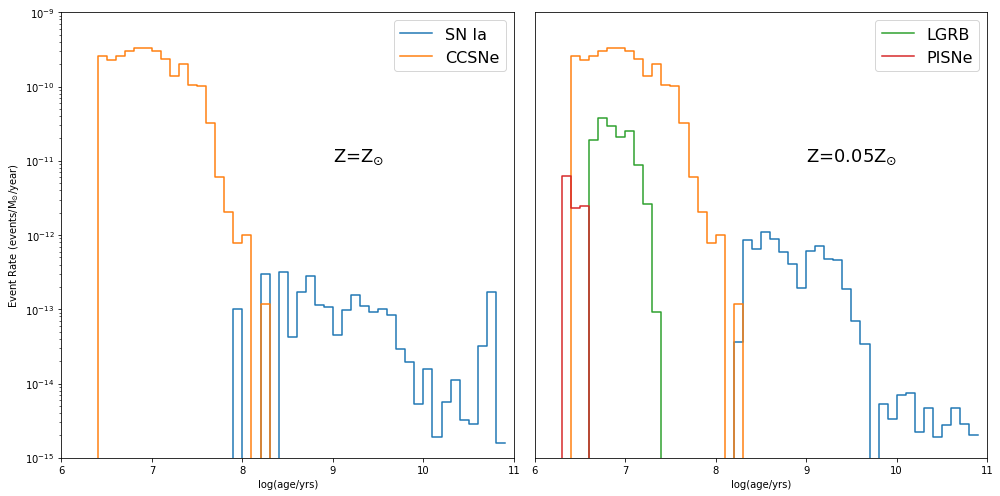

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Plot the first subplot on ax1
ax1.step(age_z_1, typeIa_norm_z_1, label='SN Ia')
ax1.step(age_z_1, ccsne_norm_z_1, label='CCSNe')

ax1.set_yscale("log")

ax1.text(9, 10**(-11), r"Z=Z$_{\odot}$", fontsize=18)

ax1.set_xlim(6, 11)
ax1.set_ylim(10**(-15), 10**(-9))

ax1.set_ylabel(r"Event Rate (events/M$_{\odot}$/year)")
ax1.set_xlabel("log(age/yrs)")
ax1.legend(fontsize=16)

# Remove the y-axis label from the second subplot
ax2.yaxis.set_visible(False)

# Plot the second subplot on ax2
ax2.step(age_z_2, typeIa_norm_z_2)
ax2.step(age_z_2, ccsne_norm_z_2)
ax2.step(age_z_2, lgrbs_norm_z_2, label='LGRB')
ax2.step(age_z_2, pisne_norm_z_2, label='PISNe')

ax2.set_yscale("log")

ax2.text(9, 10**(-11), r"Z=0.05Z$_{\odot}$", fontsize=18)

ax2.set_xlim(6, 11)
ax2.set_ylim(10**(-15), 10**(-9))

ax2.set_xlabel("log(age/yrs)")
ax2.legend(fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


The code below compares the transient rates and the delay time distributions found in Briel Figure 1 (excluding GW transients)

The DTD data was found on the GItHub associated with the paper

In [7]:
path = "/Users/dillon/Desktop"
file = h5py.File(f"{path}/data.h5", "r")
DTD = file["DTD"]

In [8]:
event_types = ["Ia", "IIP", "II", "Ib", "Ic", "LGRB", "PISNe", "BBH", "BHNS", "BNS"]
Z1 = "z020" # 0.020
Z2 = "z001" # 0.001


# For each metallicity calculate the total rates, and calculate the CCSN rates + add the GW events
event_total = {}
for i in (Z1, Z2):
    event_total[i] = {}
    for j in event_types:
        event_total[i][j] = DTD[j][i][:]
    event_total[i]["CCSN"] = event_total[i]["II"] + event_total[i]["Ib"] + event_total[i]["Ic"] + event_total[i]["IIP"]

In [9]:
x1 = event_total[Z1]
x2 = event_total[Z2]
x_axis = np.linspace(6.0, 11.0, 51)

Text(0, 0.5, 'Event Rate (events/M$_{\\odot}$/year)')

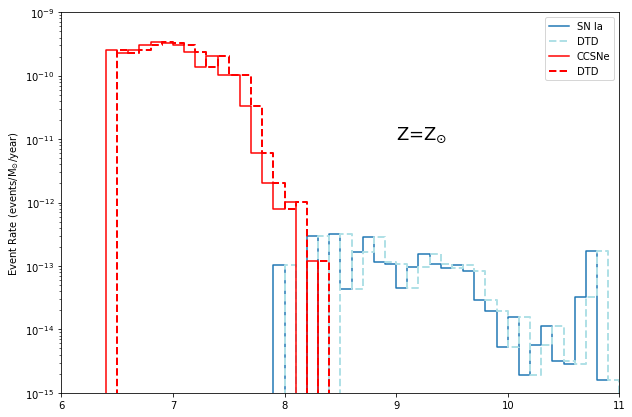

In [17]:
plt.figure(figsize = (10,7))

plt.step(age_z_1, typeIa_norm_z_1, label='SN Ia')
plt.step(x_axis, x1["Ia"], where="post",color = 'powderblue', ls ='--', lw=2, label = 'DTD')


plt.step(age_z_1, ccsne_norm_z_1, color = 'red', label='CCSNe')
plt.step(x_axis, x1["CCSN"], where="post",color = 'red', ls ='--', lw=2, label = 'DTD')


plt.yscale("log")

plt.text(9, 10**(-11), r"Z=Z$_{\odot}$", fontsize=18)

plt.legend()
plt.xlim(6, 11)
plt.ylim(10**(-15), 10**(-9))

plt.ylabel(r"Event Rate (events/M$_{\odot}$/year)")
